# Importing Libraries

In [66]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import arma_order_select_ic
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

import pandas as pd
import statsmodels.api as sm
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
from pandas import Series
from matplotlib import pyplot

# Reading Data

In [67]:
df=pd.read_excel('superstore.xls')

going to forecast for Office Supplies

In [68]:
o_s= df.loc[df['Category']== 'Office Supplies']

In [69]:
o_s


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [70]:
o_s_col = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

In [71]:
o_s.drop(o_s_col, axis =1 , inplace=True)


In [72]:
o_s


,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900
...,...,...
9982,2016-09-22,35.560
9984,2015-05-17,31.500
9985,2015-05-17,55.600
9992,2017-02-26,29.600


In [73]:
os = o_s.sort_values('Order Date')
os = os.set_index('Order Date')

In [74]:
os


,Sales
Order Date,
2014-01-03,16.448
2014-01-04,272.736
2014-01-04,11.784
2014-01-04,3.540
2014-01-05,19.536
...,...
2017-12-30,3.024
2017-12-30,20.720
2017-12-30,52.776


In [75]:
os_y = os['Sales'].resample('MS').mean()


# plotting the data

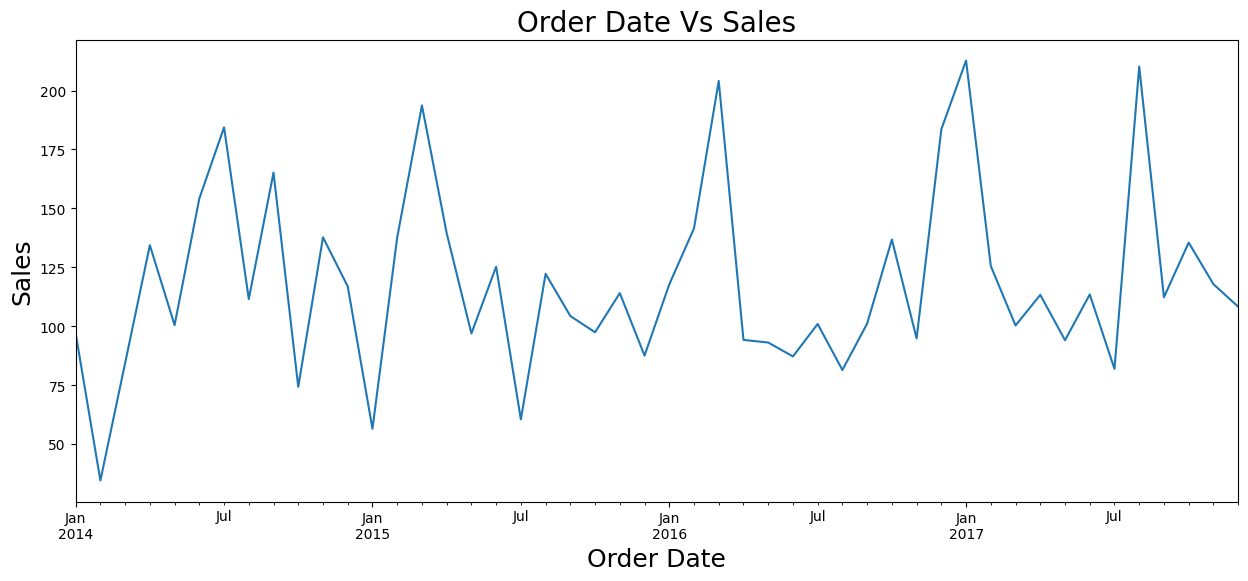

In [76]:
os_y.plot(figsize=(15,6))
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Order Date",fontsize=18)
plt.title("Order Date Vs Sales",fontsize=20)
plt.show()

In [77]:
decomposition_os = sm.tsa.seasonal_decompose(os_y,model='additive')

In [78]:
print("Trend \n ")
print(decomposition_os.trend)
print("Seasonal \n ")
print(decomposition_os.seasonal)
print("Residual \n ")
print(decomposition_os.resid)
print("Observed \n ")
print(decomposition_os.observed)

Trend 
 
Order Date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01    114.584229
2014-08-01    117.191470
2014-09-01    126.041021
2014-10-01    130.810158
2014-11-01    130.876572
2014-12-01    129.523142
2015-01-01    123.155303
2015-02-01    118.437987
2015-03-01    116.347665
2015-04-01    114.775474
2015-05-01    114.751824
2015-06-01    112.542300
2015-07-01    113.871378
2015-08-01    116.586068
2015-09-01    117.181825
2015-10-01    115.726725
2015-11-01    113.678375
2015-12-01    111.932576
2016-01-01    112.032870
2016-02-01    112.019188
2016-03-01    110.185966
2016-04-01    111.692589
2016-05-01    112.531768
2016-06-01    115.730061
2016-07-01    123.686673
2016-08-01    126.977451
2016-09-01    121.988775
2016-10-01    118.462308
2016-11-01    119.298965
2016-12-01    120.435188
2017-01-01    120.737215
2017-02-01    125.308719
2017-03-01    131.138686
2017-

<function matplotlib.pyplot.show(close=None, block=None)>

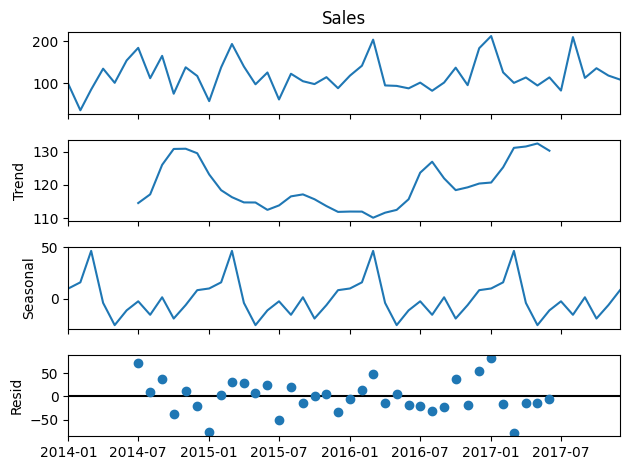

In [79]:
fig = decomposition_os.plot()
plt.show

# ACF and PACF plot

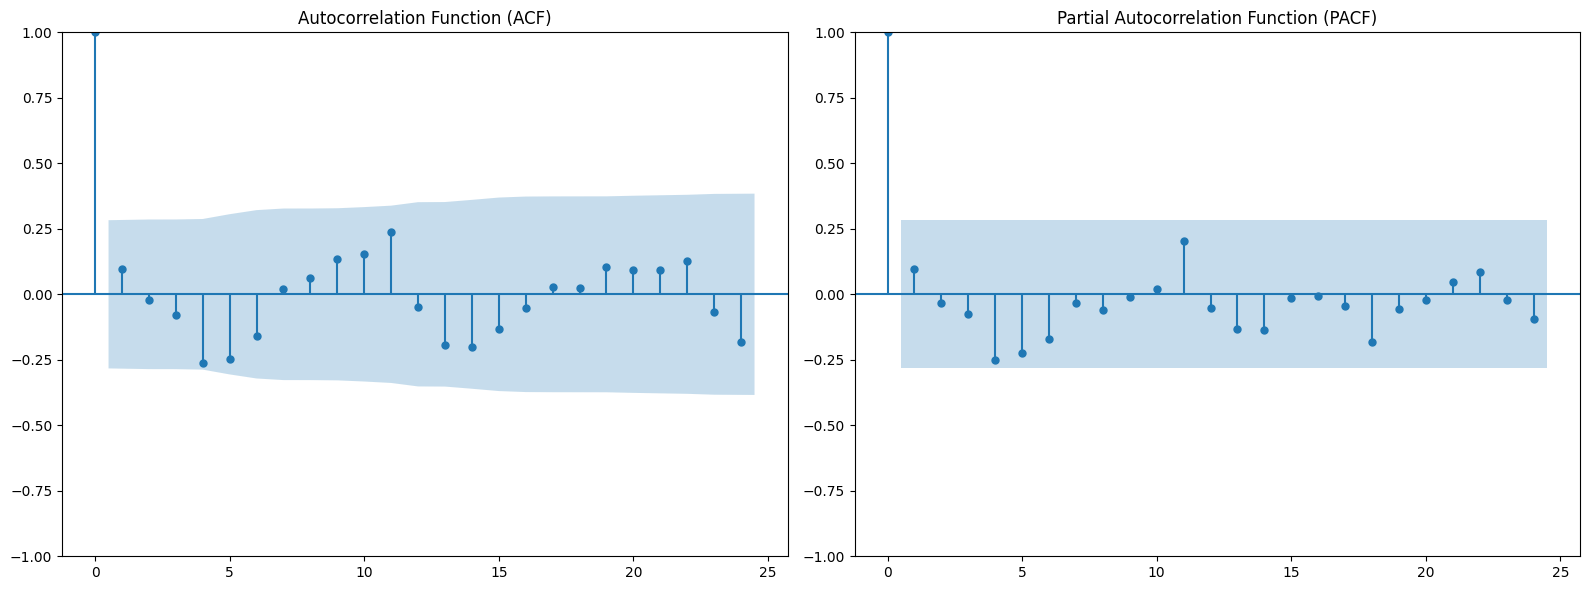

In [80]:
max_lags = int(len(os_y) / 2)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(os_y, ax=ax[0], lags=max_lags)
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(os_y, ax=ax[1], lags=max_lags)
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Rolling Statistics

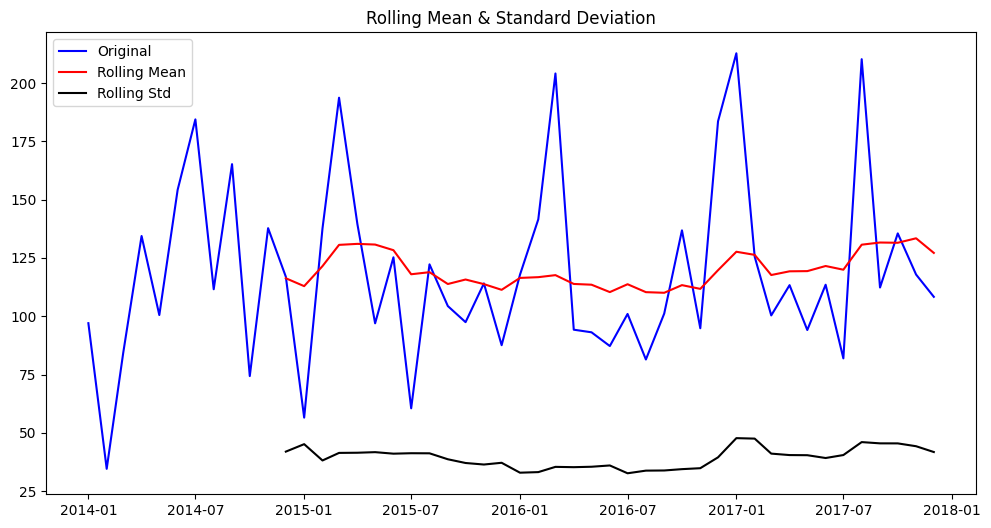

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

rolmean = os_y.rolling(window=12).mean()
rolstd = os_y.rolling(window=12).std()

plt.figure(figsize=(12, 6))
orig = plt.plot(os_y, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Augumented Dickey Fuller Test

In [82]:
result = adfuller(os_y)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -6.100365254423854
p-value: 9.869101392257589e-08
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064


# Forecasting using SARIMA

In [83]:
p = q = range(0, 3)
d = [0]
P = [1]
Q = [0]
D = [1]
s = [12]

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s[0]) for x in list(itertools.product(P, D, Q))]

best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(os_y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model = results
        except Exception as e:
            continue

print(f'Best SARIMA{best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')


Best SARIMA(2, 0, 2)x(1, 1, 0, 12) - AIC:240.9621493016849


In [84]:
mod_os = sm.tsa.statespace.SARIMAX(os_y,
                               order=(2,0,2),
                               seasonal_order= (1,1,0,12),
                               enforce_stationarity = False,
                               enforce_invertibility=False)

results_os = mod_os.fit()

In [85]:
print(results_os.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4648      0.087     16.846      0.000       1.294       1.635
ar.L2         -0.8738      0.163     -5.362      0.000      -1.193      -0.554
ma.L1         -1.7180      0.410     -4.191      0.000      -2.521      -0.915
ma.L2          1.0000      0.353      2.833      0.005       0.308       1.692
ar.S.L12      -0.4719      0.287     -1.647      0.100      -1.034       0.090
sigma2      1529.9414      0.000   3.42e+06      0.000    1529.941    1529.942


# Future Prediction

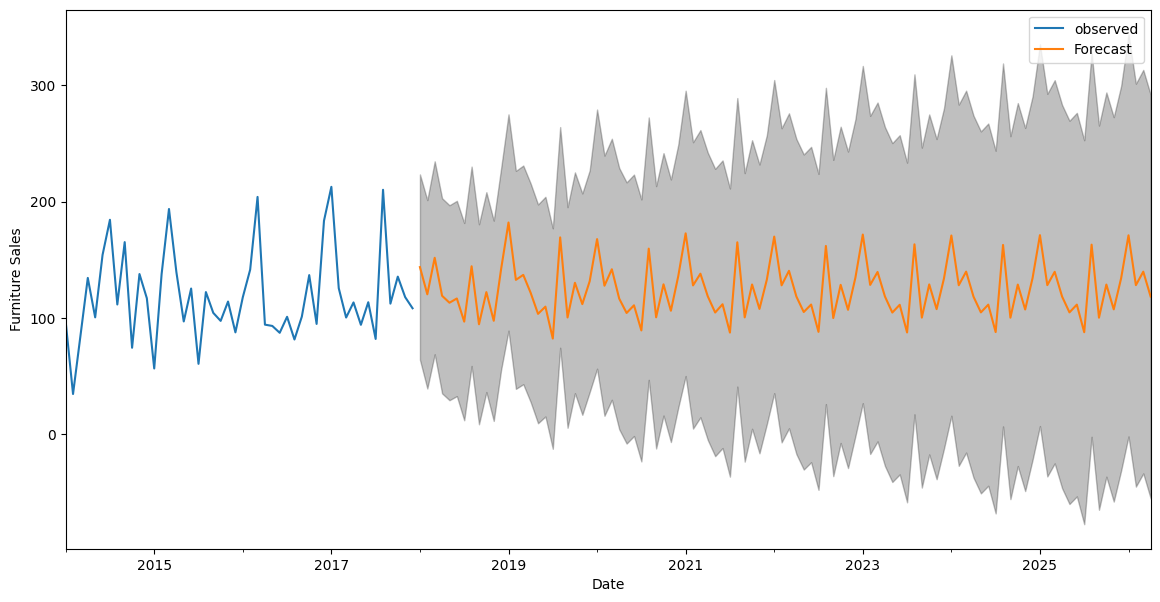

In [86]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = os_y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

# Validating Forecasts

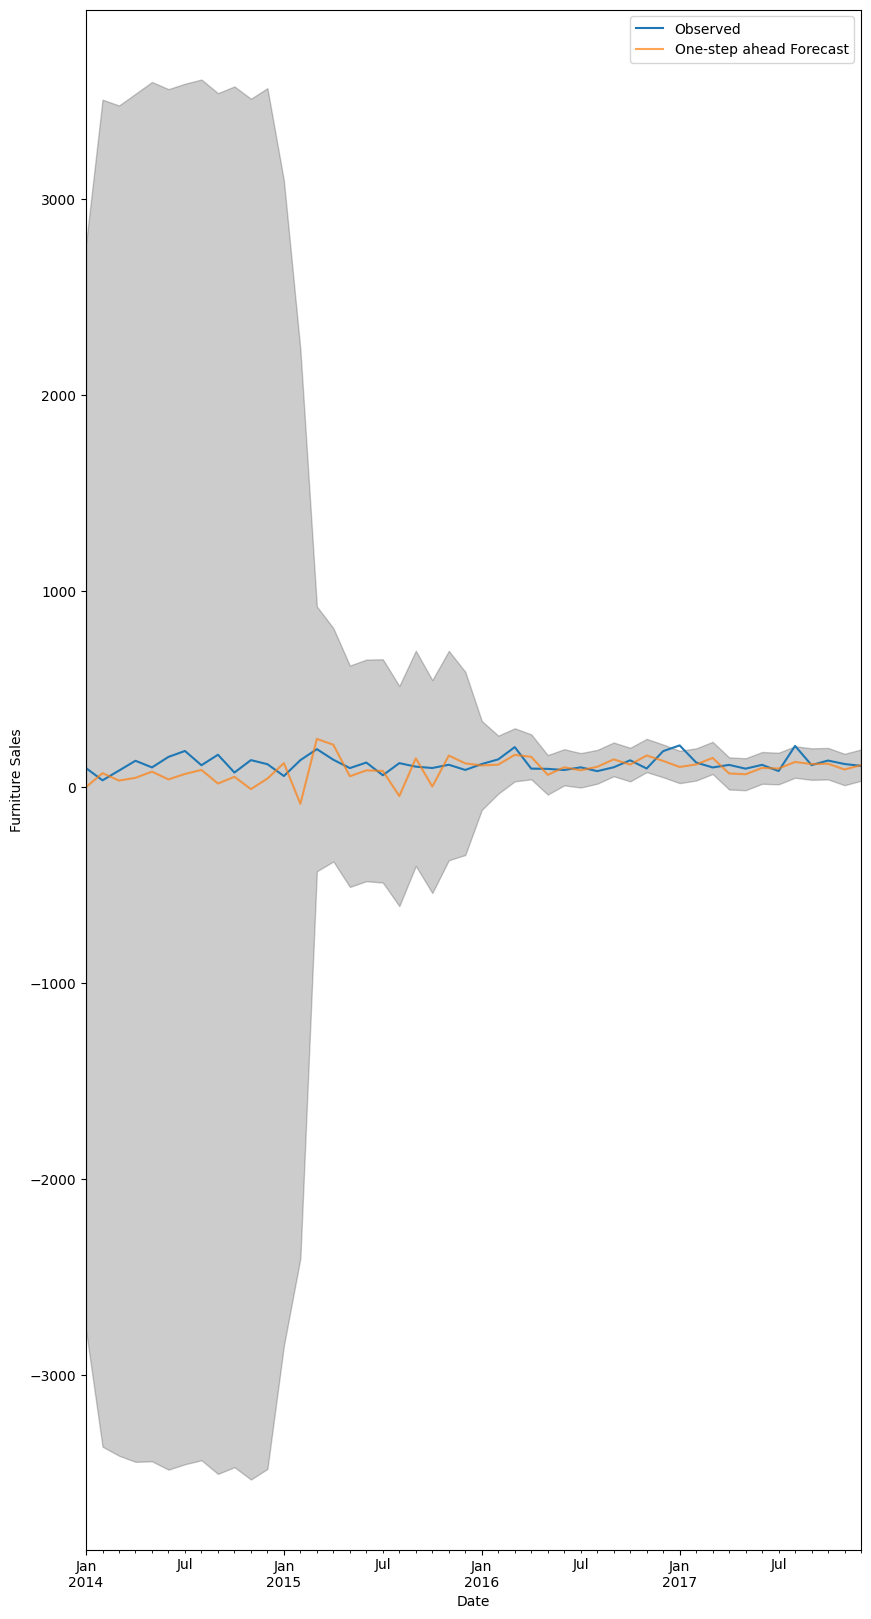

In [87]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = os_y['2014':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 20))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Original, Predicted and Residuals

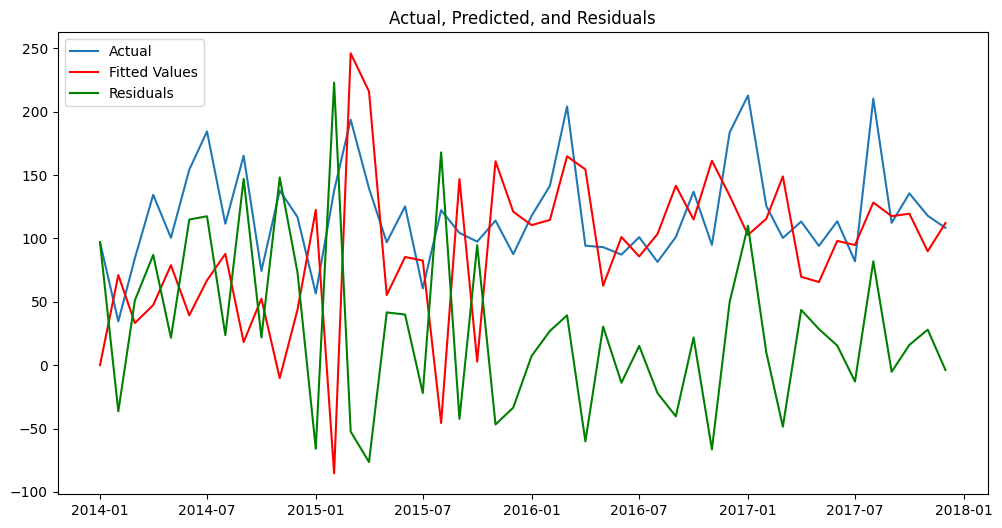

In [88]:
residuals = os_y['2014':] - pred.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(os_y['2014':], label='Actual')
plt.plot(pred.predicted_mean, color='red', label='Fitted Values')
plt.plot(residuals, color='green', label='Residuals')
plt.title('Actual, Predicted, and Residuals')
plt.legend()
plt.show()

In [89]:
'RSS: %.4f'% np.nansum((best_model.fittedvalues-os_y)**2)

'RSS: 249269.0964'

# ACF and PACF of the Residuals

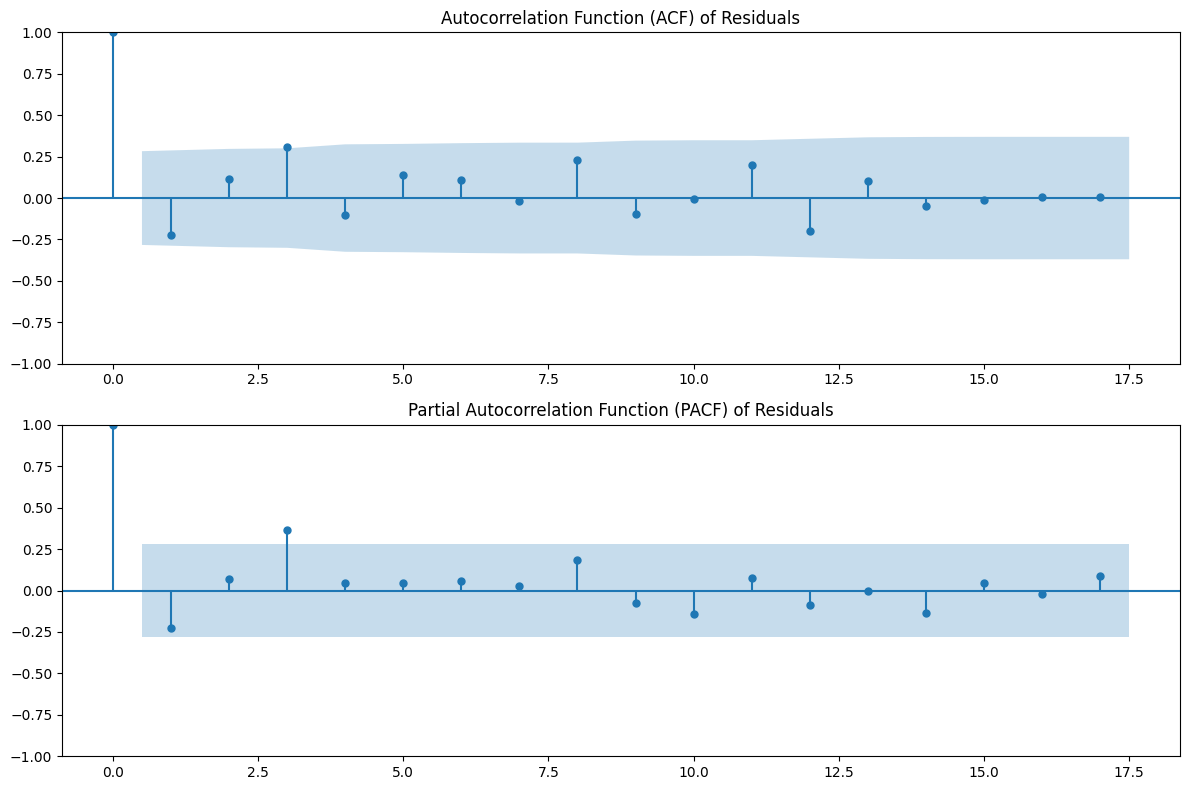

In [90]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(residuals.dropna(), ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF) of Residuals')

plot_pacf(residuals.dropna(), ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF) of Residuals')

plt.tight_layout()
plt.show()

In [91]:
y_forecasted = pred.predicted_mean
y_truth = os_y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5193.11


In [92]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 72.06
